In [46]:
#import module
import re
import json
import datetime, time
import pytz

file_dir = "/Users/NickyMc/Desktop/5/ECE219_tweet_data/tweets_#superbowl.txt"

read_file= open(file_dir)

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyze_senti=SentimentIntensityAnalyzer()


In [47]:
#get sentiment rating and location info
def in_place(location,exclude,include):
    location = location.replace(',','')
    location = location.split()
    for item in include:
        if item in location:
            return True
    return False

def get_senti(line):
    current_senti = analyze_senti.polarity_scores(line)
    return current_senti['compound']

In [48]:
#set time zone
set_zone = pytz.timezone("US/Pacific")

In [49]:
#split dataset into different clusters
def time_senti(file_lines):
    time_1 = []
    time_2 = []
    score_1 = []
    score_2 = []
    for line in file_lines.readlines():
        splited = json.loads(line)
        loc = splited["tweet"]["user"]["location"]
        in_was = in_place(loc,[],['Washington','WA','Seattle'])
        in_mas = in_place(loc,[],['Boston','MA','Massachusetts'])
        if in_was:
            rating = get_senti(splited["tweet"]["text"])
            score_1.append(rating)
            time_1.append(splited["citation_date"])
        if in_mas:
            rating = get_senti(splited["tweet"]["text"])
            score_2.append(rating)
            time_2.append(splited["citation_date"])
    file_lines.close()
    return score_1, score_2, time_1, time_2

def pac_obtain(first_state_time,second_state_time):
    time_1 = []
    time_2 = []
    for item in first_state_time:
        current = datetime.datetime.fromtimestamp(item, set_zone).replace(tzinfo=None)
        time_1.append(current)
    for item in second_state_time:
        current = datetime.datetime.fromtimestamp(item, set_zone).replace(tzinfo=None)
        time_2.append(current)
    return time_2, time_1
    
def plot_sent_graph(json_file_name):
    f = open(json_file_name)
    
    score_wa, score_ma, time_list_wa, time_list_ma = time_senti(f)
    ma_pac, wa_pac = pac_obtain(time_list_wa,time_list_ma)
    
    return ma_pac, score_ma, wa_pac, score_wa
    

In [50]:
import matplotlib.pyplot as plt

ma_pac, score_ma, wa_pac, score_wa = plot_sent_graph(file_dir)

print (len(ma_pac))
print (len(wa_pac))
print (len(score_ma))
print (len(score_wa))



18960
25008
18960
25008


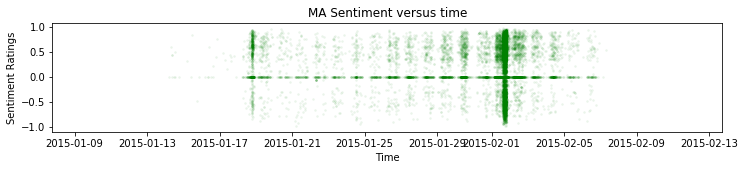

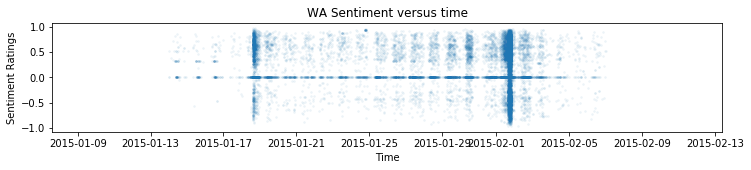

In [51]:
#Plot sentiment versus time

plt.figure(1,figsize=(12, 4))
#figsize=(20, 2)
plt.scatter(ma_pac, score_ma, alpha = 0.05, s=2, color = 'g', c=None, marker=None, cmap=None, norm=None)
plt.title("MA Sentiment versus time")
plt.xlabel("Time")
plt.ylabel("Sentiment Ratings")


plt.figure(2,figsize=(12, 4))
#figsize=(20, 2)
plt.scatter(wa_pac, score_wa, alpha = 0.05, s=2, c=None, marker=None, cmap=None, norm=None)
plt.title("WA Sentiment versus time")
plt.xlabel("Time")
plt.ylabel("Sentiment Ratings")

plt.show()